# importing required packages

- import numpy for linear algebra
- import pandas for loading the dataset, data processing
- import matplotlib and seaborn for visualization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib
# import scipy as sp
# from subprocess import check_output # #print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
import boto3
import s3fs

In [3]:
import os

# Load the datasets

- to read the file from AWS

In [4]:
client = boto3.client('s3')

In [5]:
path = 's3://nyc-taxi-system/Final_dataset.csv'

In [6]:
bulk_df = pd.read_csv(path)
bulk_df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,total_amount,congestion_surcharge,PU_zone,PU_borough,PU_latitude,PU_longitude,DO_zone,DO_borough,DO_latitude,DO_longitude
0,0,1.0,2020-01-07 21:38:40,2020-01-07 21:45:13,2.0,1.00,1.0,N,249,113,...,12.85,2.5,West Village,Manhattan,40.734186,-74.005580,Greenwich Village North,Manhattan,40.734299,-74.000573
1,1,2.0,2020-01-24 20:09:35,2020-01-24 20:52:36,1.0,3.99,1.0,N,144,142,...,35.76,2.5,Little Italy/NoLiTa,Manhattan,40.721006,-73.994702,Lincoln Square East,Manhattan,40.775707,-73.991420
2,2,2.0,2020-01-15 13:37:54,2020-01-15 13:40:47,1.0,0.43,1.0,N,238,238,...,9.49,2.5,Upper West Side North,Manhattan,40.781960,-73.981243,Upper West Side North,Manhattan,40.781960,-73.981243
3,3,2.0,2020-01-16 16:22:45,2020-01-16 16:28:19,1.0,0.60,1.0,N,164,137,...,10.80,2.5,Midtown South,Manhattan,40.749842,-73.984251,Kips Bay,Manhattan,40.739546,-73.977083
4,4,1.0,2020-01-01 14:11:40,2020-01-01 14:12:28,4.0,0.00,1.0,N,132,132,...,3.30,0.0,JFK Airport,Queens,40.642948,-73.779373,JFK Airport,Queens,40.642948,-73.779373
5,5,2.0,2020-01-22 23:33:47,2020-01-22 23:39:45,2.0,1.45,1.0,N,142,237,...,12.42,2.5,Lincoln Square East,Manhattan,40.775707,-73.991420,Upper East Side South,Manhattan,40.779468,-73.958265
6,6,1.0,2020-01-04 16:12:29,2020-01-04 16:31:23,2.0,3.90,1.0,N,90,239,...,23.30,2.5,Flatiron,Manhattan,40.741059,-73.989642,Upper West Side South,Manhattan,40.769244,-73.990767
7,7,1.0,2020-01-31 18:49:37,2020-01-31 19:03:00,1.0,2.90,1.0,N,230,236,...,15.80,2.5,Times Sq/Theatre District,Manhattan,40.758168,-73.985525,Upper East Side North,Manhattan,40.764873,-73.961511
8,8,2.0,2020-01-12 07:09:42,2020-01-12 07:14:05,2.0,1.19,1.0,N,263,140,...,11.16,2.5,Yorkville West,Manhattan,43.670470,-79.387252,Lenox Hill East,Manhattan,40.765177,-73.961595
9,9,2.0,2020-01-01 10:49:09,2020-01-01 10:52:21,1.0,0.77,1.0,N,42,42,...,5.30,0.0,Central Harlem North,Manhattan,40.799218,-73.954900,Central Harlem North,Manhattan,40.799218,-73.954900


- remove the first column which is index column saved in dataset from prior sampling process

In [7]:
bulk_df.shape

(1200911, 27)

In [8]:
bulk_df.drop(['Unnamed: 0'],axis=1,inplace=True)

### to take 10% of total dataset as a sample

In [9]:
df = bulk_df.sample(frac=0.20)

In [10]:
# df = bulk_df

In [11]:
df.shape

(240182, 26)

# Exploratory Data Analysis ( EDA )

### shape

- returns number of rows and columns

In [12]:
df.shape

(240182, 26)

- 95074 rows and 26 columns

### columns in dataset

- print the columns names

In [13]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'PU_zone', 'PU_borough',
       'PU_latitude', 'PU_longitude', 'DO_zone', 'DO_borough', 'DO_latitude',
       'DO_longitude'],
      dtype='object')

- printing first 5 records

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,PU_zone,PU_borough,PU_latitude,PU_longitude,DO_zone,DO_borough,DO_latitude,DO_longitude
49247,2.0,2020-01-25 11:48:29,2020-01-25 12:08:17,1.0,2.43,1.0,N,164,158,1.0,...,20.16,2.5,Midtown South,Manhattan,40.749842,-73.984251,Meatpacking/West Village West,Manhattan,40.739713,-74.009671
944176,2.0,2021-07-30 01:16:24,2021-07-30 01:24:19,3.0,2.58,1.0,N,114,233,2.0,...,12.80,2.5,Greenwich Village South,Manhattan,40.733584,-74.002817,UN/Turtle Bay South,Manhattan,40.760680,-73.966561
882776,2.0,2021-06-07 12:07:06,2021-06-07 12:19:25,1.0,2.05,1.0,N,236,163,1.0,...,16.56,2.5,Upper East Side North,Manhattan,40.764873,-73.961511,Midtown North,Manhattan,40.765203,-73.985104
573707,NaN,2020-12-20 11:13:00,2020-12-20 11:37:00,NaN,11.17,NaN,NaN,49,28,NaN,...,60.00,0.0,Clinton Hill,Brooklyn,40.689722,-73.965278,Briarwood/Jamaica Hills,Queens,40.710995,-73.812740
175638,2.0,2020-04-20 15:41:12,2020-04-20 15:48:33,1.0,1.95,1.0,N,229,107,1.0,...,13.56,2.5,Sutton Place/Turtle Bay North,Manhattan,40.757651,-73.961670,Gramercy,Manhattan,40.735519,-73.984079


### Demographic information of Customer & Vendor

    1. 'VendorID' – code indicating the TPER ( Taxicab and Livery Passenger ENchancement Programs (TPEP ) provider that provided the record	
	2. 'tpep_pickup_datetime' – pick up date and time 
	3. 'tpep_dropoff_datetime' – drop off date and time
    4. 'passenger_count' – passenger count 
	5. 'trip_distance' – elapsed trip distance in miles reported by the taximeter 
	6. 'RatecodeID' – final rate code effect at the end of the trip
		1 – Standard Rate
		2 – JFK
		3 – Newark
		4 – Nassau
		5 – Negotiated fare
		6 – group ride
	7. 'store_and_fwd_flag' – flag indicated whether the trip record was held in vehicle
		Y – store and forward trip
		N – not a store and forward trip
    8. 'PULocationID' – TLC Taxi zone in which taximeter was engaged 
	9. 'DOLocationID' – TLC Taxi zone in whoch taximeter was disengaged 
	10. 'payment_type' – numeric code signifying the payment mode
		1 – credit card
		2 – cash
		3 – no charge
		4 – dispute
		5 – unknown
		6 – voided trip
 	11. 'fare_amount' – time and distance fare calculated by the meter 
	12. 'extra' – miscellaneous extras and surcharges.
		1. Rush charge – 0.5 USD
		2. Overnight charge – 1 USD
    13. 'mta_tax' – 0.50 MTA tax, automatically added 
	14. 'tip_amount' – tip amount. field is automatically populated for credit card tips., cash tips are not included. 
	15. 'tolls_amount' – total amount of all tolls paid in trip 
	16. 'improvement_surcharge' – 0.30 imporvement surcharge assessed trips at the flag drop.
        17. 'total_amount' – total amount charged to passengers. Does not include cash tips. 
	18. 'congestion_surcharge' – additional charge added to base charge during unusal events like strikes, bad winter, major port fires.
    19. zone_x - pick up zone
    20. borough_x - pick up borough
    21. PUlatitude - pick up latitude
    22. PUlongitude - pick up longitude
    23. zone_y - drop off zone
    24. borough_y - drop off borough
    25. DOlatitude - drop off latitude
    26. DOlongitude - drop off longitude

### info()

- it will tell you how many entries you have, the names of each column, the data type of each column, and how many non-null values you have in each column

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240182 entries, 49247 to 574051
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               227708 non-null  float64
 1   tpep_pickup_datetime   240182 non-null  object 
 2   tpep_dropoff_datetime  240182 non-null  object 
 3   passenger_count        227708 non-null  float64
 4   trip_distance          240182 non-null  float64
 5   RatecodeID             227708 non-null  float64
 6   store_and_fwd_flag     227708 non-null  object 
 7   PULocationID           240182 non-null  int64  
 8   DOLocationID           240182 non-null  int64  
 9   payment_type           227708 non-null  float64
 10  fare_amount            240182 non-null  float64
 11  extra                  240182 non-null  float64
 12  mta_tax                240182 non-null  float64
 13  tip_amount             240182 non-null  float64
 14  tolls_amount           240182 no

### Descriptive Statistics

- Descriptive statistics is a helpful way to understand characteristics of your data and to get a quick summary of it. 
- The describe function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation etc. 
- Any missing value or NaN value is automatically skipped. 

In [16]:
df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PU_latitude,PU_longitude,DO_latitude,DO_longitude
count,227708.000000,227708.000000,240182.000000,227708.000000,240182.000000,240182.000000,227708.000000,240182.000000,240182.000000,240182.000000,240182.000000,240182.000000,240182.000000,240182.000000,240182.000000,237553.000000,237553.000000,237859.000000,237859.000000
mean,1.660210,1.447964,4.233482,1.047513,163.141842,160.037318,1.297131,12.872596,1.041284,0.492218,2.030332,0.321488,0.297273,18.507405,2.159976,40.832614,-74.109371,40.832767,-74.097881
std,0.473667,1.094511,405.360034,0.833995,67.577783,71.800957,0.498076,11.938666,1.255397,0.076836,2.560653,1.592241,0.039544,14.028351,0.880414,0.472021,0.868372,0.467956,0.851996
min,1.000000,0.000000,-21.360000,1.000000,1.000000,1.000000,1.000000,-145.000000,-4.500000,-0.500000,-3.580000,-11.120000,-0.300000,-145.300000,-2.500000,40.508475,-79.439392,40.508475,-79.439392
25%,1.000000,1.000000,1.000000,1.000000,114.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,11.150000,2.500000,40.739713,-73.991420,40.739546,-73.991420
50%,2.000000,1.000000,1.700000,1.000000,162.000000,161.000000,1.000000,9.000000,0.500000,0.500000,1.860000,0.000000,0.300000,14.300000,2.500000,40.759822,-73.984079,40.759822,-73.981243
75%,2.000000,1.000000,3.190000,1.000000,234.000000,234.000000,2.000000,14.500000,2.500000,0.500000,2.760000,0.000000,0.300000,20.300000,2.500000,40.775707,-73.961511,40.775707,-73.961511
max,4.000000,8.000000,186510.670000,99.000000,265.000000,265.000000,4.000000,563.790000,87.560000,0.500000,200.060000,122.000000,0.300000,563.790000,2.500000,44.810791,-72.515328,44.810791,-72.515328


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VendorID,227708.0,1.660210,0.473667,1.000000,1.000000,2.000000,2.000000,4.000000
passenger_count,227708.0,1.447964,1.094511,0.000000,1.000000,1.000000,1.000000,8.000000
trip_distance,240182.0,4.233482,405.360034,-21.360000,1.000000,1.700000,3.190000,186510.670000
RatecodeID,227708.0,1.047513,0.833995,1.000000,1.000000,1.000000,1.000000,99.000000
PULocationID,240182.0,163.141842,67.577783,1.000000,114.000000,162.000000,234.000000,265.000000
DOLocationID,240182.0,160.037318,71.800957,1.000000,107.000000,161.000000,234.000000,265.000000
payment_type,227708.0,1.297131,0.498076,1.000000,1.000000,1.000000,2.000000,4.000000
fare_amount,240182.0,12.872596,11.938666,-145.000000,6.500000,9.000000,14.500000,563.790000
extra,240182.0,1.041284,1.255397,-4.500000,0.000000,0.500000,2.500000,87.560000
mta_tax,240182.0,0.492218,0.076836,-0.500000,0.500000,0.500000,0.500000,0.500000


- mean of values of column

- median of respective columns

- mode of values of columns

### to check the null values

In [18]:
df.isnull().sum()

VendorID                 12474
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12474
trip_distance                0
RatecodeID               12474
store_and_fwd_flag       12474
PULocationID                 0
DOLocationID                 0
payment_type             12474
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
PU_zone                   2629
PU_borough                2629
PU_latitude               2629
PU_longitude              2629
DO_zone                   2323
DO_borough                2323
DO_latitude               2323
DO_longitude              2323
dtype: int64

### checking the missing values

In [19]:
df.isna().sum()

VendorID                 12474
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12474
trip_distance                0
RatecodeID               12474
store_and_fwd_flag       12474
PULocationID                 0
DOLocationID                 0
payment_type             12474
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
PU_zone                   2629
PU_borough                2629
PU_latitude               2629
PU_longitude              2629
DO_zone                   2323
DO_borough                2323
DO_latitude               2323
DO_longitude              2323
dtype: int64

### unique elements

In [20]:
df.nunique()

VendorID                      3
tpep_pickup_datetime     239456
tpep_dropoff_datetime    239435
passenger_count               8
trip_distance              2819
RatecodeID                    7
store_and_fwd_flag            2
PULocationID                252
DOLocationID                259
payment_type                  4
fare_amount                4022
extra                        40
mta_tax                       3
tip_amount                 1674
tolls_amount                194
improvement_surcharge         3
total_amount               5939
congestion_surcharge          4
PU_zone                     248
PU_borough                    6
PU_latitude                 249
PU_longitude                249
DO_zone                     255
DO_borough                    6
DO_latitude                 256
DO_longitude                256
dtype: int64

#### Conclusion:


- there are 3 vendors active in NYC
- The fare_amount variable has negative value as minimum value which is unusual
- The passenger_count variable having 0 as minimum no of passengers and maximum as 9
- The pickup and dropoff zone's location_Id shouldn't be greter than 263

# Data Cleansing

#### analysis of records having null values

- finds the null values and gives statistical analysis of the number of values .

In [21]:
ndf=df.isnull()
ndf.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,PU_zone,PU_borough,PU_latitude,PU_longitude,DO_zone,DO_borough,DO_latitude,DO_longitude
count,240182,240182,240182,240182,240182,240182,240182,240182,240182,240182,...,240182,240182,240182,240182,240182,240182,240182,240182,240182,240182
unique,2,1,1,2,1,2,2,1,1,2,...,1,1,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,227708,240182,240182,227708,240182,227708,227708,240182,240182,227708,...,240182,240182,237553,237553,237553,237553,237859,237859,237859,237859


### cleansing the data

- count of null values

In [22]:
df.isna().sum()

VendorID                 12474
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          12474
trip_distance                0
RatecodeID               12474
store_and_fwd_flag       12474
PULocationID                 0
DOLocationID                 0
payment_type             12474
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
PU_zone                   2629
PU_borough                2629
PU_latitude               2629
PU_longitude              2629
DO_zone                   2323
DO_borough                2323
DO_latitude               2323
DO_longitude              2323
dtype: int64

In [23]:
# df = df.replace('0', np.nan)

- drop the null values

In [24]:
df=df.dropna()

In [25]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
PU_zone                  0
PU_borough               0
PU_latitude              0
PU_longitude             0
DO_zone                  0
DO_borough               0
DO_latitude              0
DO_longitude             0
dtype: int64

- statistical description after removing the null values

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224822 entries, 49247 to 574051
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               224822 non-null  float64
 1   tpep_pickup_datetime   224822 non-null  object 
 2   tpep_dropoff_datetime  224822 non-null  object 
 3   passenger_count        224822 non-null  float64
 4   trip_distance          224822 non-null  float64
 5   RatecodeID             224822 non-null  float64
 6   store_and_fwd_flag     224822 non-null  object 
 7   PULocationID           224822 non-null  int64  
 8   DOLocationID           224822 non-null  int64  
 9   payment_type           224822 non-null  float64
 10  fare_amount            224822 non-null  float64
 11  extra                  224822 non-null  float64
 12  mta_tax                224822 non-null  float64
 13  tip_amount             224822 non-null  float64
 14  tolls_amount           224822 no

# Data Preprocessing

#### renaming the columns names

In [27]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'PU_zone', 'PU_borough',
       'PU_latitude', 'PU_longitude', 'DO_zone', 'DO_borough', 'DO_latitude',
       'DO_longitude'],
      dtype='object')

In [28]:
df = df.rename(columns={"PU_latitude":"pickup_latitude", "PU_longitude":"pickup_longitude", "DO_latitude":"dropoff_latitude", "DO_longitude":"dropoff_longitude", "tpep_pickup_datetime":"pickup_datetime", "tpep_dropoff_datetime":"dropoff_datetime"})
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,PU_zone,PU_borough,pickup_latitude,pickup_longitude,DO_zone,DO_borough,dropoff_latitude,dropoff_longitude
49247,2.0,2020-01-25 11:48:29,2020-01-25 12:08:17,1.0,2.43,1.0,N,164,158,1.0,...,20.16,2.5,Midtown South,Manhattan,40.749842,-73.984251,Meatpacking/West Village West,Manhattan,40.739713,-74.009671
944176,2.0,2021-07-30 01:16:24,2021-07-30 01:24:19,3.0,2.58,1.0,N,114,233,2.0,...,12.80,2.5,Greenwich Village South,Manhattan,40.733584,-74.002817,UN/Turtle Bay South,Manhattan,40.760680,-73.966561
882776,2.0,2021-06-07 12:07:06,2021-06-07 12:19:25,1.0,2.05,1.0,N,236,163,1.0,...,16.56,2.5,Upper East Side North,Manhattan,40.764873,-73.961511,Midtown North,Manhattan,40.765203,-73.985104
175638,2.0,2020-04-20 15:41:12,2020-04-20 15:48:33,1.0,1.95,1.0,N,229,107,1.0,...,13.56,2.5,Sutton Place/Turtle Bay North,Manhattan,40.757651,-73.961670,Gramercy,Manhattan,40.735519,-73.984079
470222,2.0,2020-10-22 21:01:03,2020-10-23 20:17:20,1.0,3.92,1.0,N,186,238,2.0,...,17.80,2.5,Penn Station/Madison Sq West,Manhattan,40.750643,-73.993353,Upper West Side North,Manhattan,40.781960,-73.981243


#### remove the locations outside the New York City

- minimum and maximum latitude and longitude of NYC

In [29]:
def min_max():
    print(df['pickup_longitude'].max(),df['pickup_longitude'].min())
    print(df['pickup_latitude'].max(),df['pickup_latitude'].min())

    print(df['dropoff_longitude'].max(),df['dropoff_longitude'].min())
    print(df['dropoff_latitude'].max(),df['dropoff_latitude'].min())
min_max()

-72.515328 -79.439392
44.8107911 40.50847483
-72.515328 -79.439392
44.8107911 40.50847483


- remove where pickup and drop location are same

In [30]:
print(df[(df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude'])].shape)
df=df[~((df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude']))]

(13296, 26)


- shape of data frame 

In [31]:
df.shape

(211526, 26)

- boundary for new york latitude longitude...

In [32]:
boundary={"min_lat":40.573143,
         "min_lang":-74.252193,
         "max_lat":41.709555,
         "max_lang":-72.986532}

- count of locations outside the new york city

In [33]:
print(df[(df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang'])].shape[0])
print(df[(df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang'])].shape[0])

5670
6015
5802
6752


- removing the locations which are outside the boundaries

In [34]:
df=df[~((df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat']))]
df=df[~((df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang']))]

df=df[~((df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat']))]
df=df[~((df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang']))]

df.shape

(198455, 26)

### plotting the pickup latitude and pickup longitude

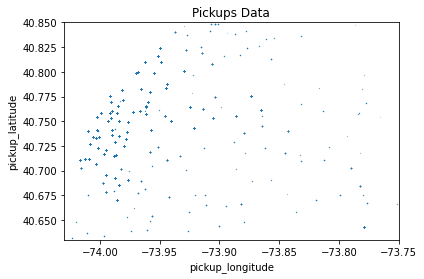

In [35]:
df.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)

city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

### plot of dropoff latitude and dropoff longitude

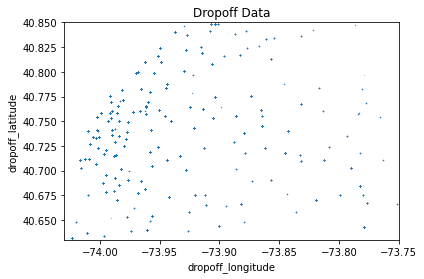

In [36]:
df.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.5,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Dropoff Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

### Passengers Count Data

- max and min count of passengers

In [37]:
df['passenger_count']=df['passenger_count'].astype(int)
print(df['passenger_count'].max())
print(df['passenger_count'].min())

8
0


In [38]:
df.passenger_count.value_counts()

1    146548
2     27694
3      7117
5      5777
0      4301
6      3984
4      3033
8         1
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='count', ylabel='passenger_count'>

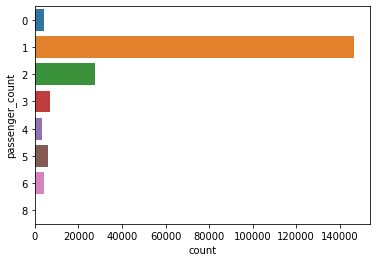

In [39]:
sns.countplot(y='passenger_count',data=df)

- removing records with passengers more than 6

In [40]:
df=df[~((df['passenger_count']>6))]
df.shape

(198454, 26)

- removing passengers with negative value as a count

In [41]:
df[df['fare_amount']<=0]['fare_amount'].count()
df=df[~(df['fare_amount']<=0)]
df.shape

(197810, 26)

# Feature Engineering

### checking the data types of the columns

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197810 entries, 49247 to 574051
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               197810 non-null  float64
 1   pickup_datetime        197810 non-null  object 
 2   dropoff_datetime       197810 non-null  object 
 3   passenger_count        197810 non-null  int32  
 4   trip_distance          197810 non-null  float64
 5   RatecodeID             197810 non-null  float64
 6   store_and_fwd_flag     197810 non-null  object 
 7   PULocationID           197810 non-null  int64  
 8   DOLocationID           197810 non-null  int64  
 9   payment_type           197810 non-null  float64
 10  fare_amount            197810 non-null  float64
 11  extra                  197810 non-null  float64
 12  mta_tax                197810 non-null  float64
 13  tip_amount             197810 non-null  float64
 14  tolls_amount           197810 no

- changing the data type from string to timestamp

In [43]:
type(df['pickup_datetime'].iloc[0])

str

In [44]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
type(df['pickup_datetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [45]:
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
type(df['dropoff_datetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### adding the new column for day of week, hour of day, month and year, trip duration

In [46]:
df['pickup_day']=df['pickup_datetime'].dt.dayofweek
df['dropoff_day']=df['dropoff_datetime'].dt.dayofweek

In [47]:
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday

In [48]:
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

In [49]:
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [50]:
df['pickup_year']=df['pickup_datetime'].dt.year
df['dropoff_year']=df['dropoff_datetime'].dt.year

In [51]:
df['trip_duration'] = df.dropoff_datetime - df.pickup_datetime 
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration
49247,2.0,2020-01-25 11:48:29,2020-01-25 12:08:17,1,2.43,1.0,N,164,158,1.0,...,5,5,5,11,12,1,1,2020,2020,0 days 00:19:48
944176,2.0,2021-07-30 01:16:24,2021-07-30 01:24:19,3,2.58,1.0,N,114,233,2.0,...,4,4,4,1,1,7,7,2021,2021,0 days 00:07:55
882776,2.0,2021-06-07 12:07:06,2021-06-07 12:19:25,1,2.05,1.0,N,236,163,1.0,...,0,0,0,12,12,6,6,2021,2021,0 days 00:12:19
175638,2.0,2020-04-20 15:41:12,2020-04-20 15:48:33,1,1.95,1.0,N,229,107,1.0,...,0,0,0,15,15,4,4,2020,2020,0 days 00:07:21
470222,2.0,2020-10-22 21:01:03,2020-10-23 20:17:20,1,3.92,1.0,N,186,238,2.0,...,4,3,4,21,20,10,10,2020,2020,0 days 23:16:17


- pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.
- pickup_day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.
- pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.
- pickup_month and dropoff_month with month number with January=1 and December=12.

- changing the data type of trip duration

In [52]:
type(df.trip_duration)

pandas.core.series.Series

In [53]:
df['trip_duration']=pd.to_timedelta(df['trip_duration'])

In [54]:
type(df.trip_duration.iloc[0])

pandas._libs.tslibs.timedeltas.Timedelta

In [55]:
for i in range(len(df)):
    
    df.trip_duration.iloc[i] = df.trip_duration.iloc[i].seconds

C:\Users\onkar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [56]:
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration
49247,2.0,2020-01-25 11:48:29,2020-01-25 12:08:17,1,2.43,1.0,N,164,158,1.0,...,5,5,5,11,12,1,1,2020,2020,1188
944176,2.0,2021-07-30 01:16:24,2021-07-30 01:24:19,3,2.58,1.0,N,114,233,2.0,...,4,4,4,1,1,7,7,2021,2021,475
882776,2.0,2021-06-07 12:07:06,2021-06-07 12:19:25,1,2.05,1.0,N,236,163,1.0,...,0,0,0,12,12,6,6,2021,2021,739
175638,2.0,2020-04-20 15:41:12,2020-04-20 15:48:33,1,1.95,1.0,N,229,107,1.0,...,0,0,0,15,15,4,4,2020,2020,441
470222,2.0,2020-10-22 21:01:03,2020-10-23 20:17:20,1,3.92,1.0,N,186,238,2.0,...,4,3,4,21,20,10,10,2020,2020,83777


### function to determine at what time of day ride was taken

In [57]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [58]:
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

In [59]:
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday
49247,2.0,2020-01-25 11:48:29,2020-01-25 12:08:17,1,2.43,1.0,N,164,158,1.0,...,5,11,12,1,1,2020,2020,1188,Morning,Afternoon
944176,2.0,2021-07-30 01:16:24,2021-07-30 01:24:19,3,2.58,1.0,N,114,233,2.0,...,4,1,1,7,7,2021,2021,475,Late night,Late night
882776,2.0,2021-06-07 12:07:06,2021-06-07 12:19:25,1,2.05,1.0,N,236,163,1.0,...,0,12,12,6,6,2021,2021,739,Afternoon,Afternoon
175638,2.0,2020-04-20 15:41:12,2020-04-20 15:48:33,1,1.95,1.0,N,229,107,1.0,...,0,15,15,4,4,2020,2020,441,Afternoon,Afternoon
470222,2.0,2020-10-22 21:01:03,2020-10-23 20:17:20,1,3.92,1.0,N,186,238,2.0,...,4,21,20,10,10,2020,2020,83777,Evening,Evening


### mid night trip column

- 1 for YES
- 0 for NO
- Let's add the feature called mid night trip usually fare during night hours are high compare to day time
- The trip between night 11'o clock to morning 5'o clock are labelled mid night trip

In [60]:
df['mid_night_trip']=((df['pickup_timeofday']=='Late night')).astype(int)
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday,mid_night_trip
49247,2.0,2020-01-25 11:48:29,2020-01-25 12:08:17,1,2.43,1.0,N,164,158,1.0,...,11,12,1,1,2020,2020,1188,Morning,Afternoon,0
944176,2.0,2021-07-30 01:16:24,2021-07-30 01:24:19,3,2.58,1.0,N,114,233,2.0,...,1,1,7,7,2021,2021,475,Late night,Late night,1
882776,2.0,2021-06-07 12:07:06,2021-06-07 12:19:25,1,2.05,1.0,N,236,163,1.0,...,12,12,6,6,2021,2021,739,Afternoon,Afternoon,0
175638,2.0,2020-04-20 15:41:12,2020-04-20 15:48:33,1,1.95,1.0,N,229,107,1.0,...,15,15,4,4,2020,2020,441,Afternoon,Afternoon,0
470222,2.0,2020-10-22 21:01:03,2020-10-23 20:17:20,1,3.92,1.0,N,186,238,2.0,...,21,20,10,10,2020,2020,83777,Evening,Evening,0


### 'Rush hour trip' column

- New York City has rush hour means heavy traffic from 4 PM to 8 PM
- So fare rates may differ from other %time

In [61]:
df['rush_hour_trip']=((df['pickup_timeofday']=='Evening')).astype(int)
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday,mid_night_trip,rush_hour_trip
49247,2.0,2020-01-25 11:48:29,2020-01-25 12:08:17,1,2.43,1.0,N,164,158,1.0,...,12,1,1,2020,2020,1188,Morning,Afternoon,0,0
944176,2.0,2021-07-30 01:16:24,2021-07-30 01:24:19,3,2.58,1.0,N,114,233,2.0,...,1,7,7,2021,2021,475,Late night,Late night,1,0
882776,2.0,2021-06-07 12:07:06,2021-06-07 12:19:25,1,2.05,1.0,N,236,163,1.0,...,12,6,6,2021,2021,739,Afternoon,Afternoon,0,0
175638,2.0,2020-04-20 15:41:12,2020-04-20 15:48:33,1,1.95,1.0,N,229,107,1.0,...,15,4,4,2020,2020,441,Afternoon,Afternoon,0,0
470222,2.0,2020-10-22 21:01:03,2020-10-23 20:17:20,1,3.92,1.0,N,186,238,2.0,...,20,10,10,2020,2020,83777,Evening,Evening,0,1


### Trips in snow season

- During snow season the taxi is very less available compare to other months i.e. taxi fare during snow season is high.
- NYC has the snow season from December to March but December and March has less snow compare to Jan and Feb
- So we will check if trip was in month of Jan and Feb it is during snow season

In [62]:
df['snow_season']=((df['pickup_month']==1) | (df['pickup_month']==2)).astype(int)
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_month,dropoff_month,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday,mid_night_trip,rush_hour_trip,snow_season
49247,2.0,2020-01-25 11:48:29,2020-01-25 12:08:17,1,2.43,1.0,N,164,158,1.0,...,1,1,2020,2020,1188,Morning,Afternoon,0,0,1
944176,2.0,2021-07-30 01:16:24,2021-07-30 01:24:19,3,2.58,1.0,N,114,233,2.0,...,7,7,2021,2021,475,Late night,Late night,1,0,0
882776,2.0,2021-06-07 12:07:06,2021-06-07 12:19:25,1,2.05,1.0,N,236,163,1.0,...,6,6,2021,2021,739,Afternoon,Afternoon,0,0,0
175638,2.0,2020-04-20 15:41:12,2020-04-20 15:48:33,1,1.95,1.0,N,229,107,1.0,...,4,4,2020,2020,441,Afternoon,Afternoon,0,0,0
470222,2.0,2020-10-22 21:01:03,2020-10-23 20:17:20,1,3.92,1.0,N,186,238,2.0,...,10,10,2020,2020,83777,Evening,Evening,0,1,0


### Distance calculator between pickup and drop coordinates

- Distance and the fare amount has the direct correlation if distance increase fare will be increase
- We will use python's geopy library to add column trip_distance which will have distance between two coordinates

###### using geopy library

In [63]:
from geopy.distance import geodesic

def distance_calculate(lat,long,drop_lat,drop_long):    
    newport_ri = (lat,long)
    cleveland_oh = (drop_lat,drop_long)
    dist=geodesic(newport_ri, cleveland_oh).miles
    return dist

In [64]:
df['distance_lib']=list(map(distance_calculate,df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude']))
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_month,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday,mid_night_trip,rush_hour_trip,snow_season,distance_lib
49247,2.0,2020-01-25 11:48:29,2020-01-25 12:08:17,1,2.43,1.0,N,164,158,1.0,...,1,2020,2020,1188,Morning,Afternoon,0,0,1,1.506024
944176,2.0,2021-07-30 01:16:24,2021-07-30 01:24:19,3,2.58,1.0,N,114,233,2.0,...,7,2021,2021,475,Late night,Late night,1,0,0,2.667542
882776,2.0,2021-06-07 12:07:06,2021-06-07 12:19:25,1,2.05,1.0,N,236,163,1.0,...,6,2021,2021,739,Afternoon,Afternoon,0,0,0,1.238014
175638,2.0,2020-04-20 15:41:12,2020-04-20 15:48:33,1,1.95,1.0,N,229,107,1.0,...,4,2020,2020,441,Afternoon,Afternoon,0,0,0,1.927535
470222,2.0,2020-10-22 21:01:03,2020-10-23 20:17:20,1,3.92,1.0,N,186,238,2.0,...,10,2020,2020,83777,Evening,Evening,0,1,0,2.252456


###### using haverstine dsitance formula

In [65]:
from math import radians, cos, sin, asin, sqrt

def haversine_distance(row):
#     lon1, lat1, lon2, lat2):
    """
    Calculate the circle distance between two points in lat and lon
    on the earth (specified in decimal degrees)
    returning distance in miles
    """
    # need to convert decimal degrees to radians 
    # a unit of angle, equal to an angle at the center of a circle whose arc is equal in length to the radius.
    lon1, lat1, lon2, lat2 = row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3965 # Radius of earth in kilometers (6371 for kms). Use 3956 for miles
    return c * r
#applying to the dataset
df['haversine_distance'] = df.apply(haversine_distance, axis=1)

In [66]:
df.head()

,VendorID,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_year,dropoff_year,trip_duration,pickup_timeofday,dropoff_timeofday,mid_night_trip,rush_hour_trip,snow_season,distance_lib,haversine_distance
49247,2.0,2020-01-25 11:48:29,2020-01-25 12:08:17,1,2.43,1.0,N,164,158,1.0,...,2020,2020,1188,Morning,Afternoon,0,0,1,1.506024,1.505816
944176,2.0,2021-07-30 01:16:24,2021-07-30 01:24:19,3,2.58,1.0,N,114,233,2.0,...,2021,2021,475,Late night,Late night,1,0,0,2.667542,2.670020
882776,2.0,2021-06-07 12:07:06,2021-06-07 12:19:25,1,2.05,1.0,N,236,163,1.0,...,2021,2021,739,Afternoon,Afternoon,0,0,0,1.238014,1.236812
175638,2.0,2020-04-20 15:41:12,2020-04-20 15:48:33,1,1.95,1.0,N,229,107,1.0,...,2020,2020,441,Afternoon,Afternoon,0,0,0,1.927535,1.930342
470222,2.0,2020-10-22 21:01:03,2020-10-23 20:17:20,1,3.92,1.0,N,186,238,2.0,...,2020,2020,83777,Evening,Evening,0,1,0,2.252456,2.258275


###### comparing both the calculated distances and getting it's mean as a value

In [67]:
df1 = df[['distance_lib', 'haversine_distance']]
df1.head()

,distance_lib,haversine_distance
49247,1.506024,1.505816
944176,2.667542,2.670020
882776,1.238014,1.236812
175638,1.927535,1.930342
470222,2.252456,2.258275


In [68]:
df['trip_distance'] = (df['distance_lib']+df['haversine_distance'])/2
df['trip_distance'].head()

49247     1.505920
944176    2.668781
882776    1.237413
175638    1.928938
470222    2.255365
Name: trip_distance, dtype: float64

In [69]:
df.columns

Index(['VendorID', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'PU_zone', 'PU_borough', 'pickup_latitude',
       'pickup_longitude', 'DO_zone', 'DO_borough', 'dropoff_latitude',
       'dropoff_longitude', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_year', 'dropoff_year', 'trip_duration',
       'pickup_timeofday', 'dropoff_timeofday', 'mid_night_trip',
       'rush_hour_trip', 'snow_season', 'distance_lib', 'haversine_distance'],
      dtype='object')

### Mapping

###### Convert specific pickup and drop Coordinates into location

- We have set the boundary for the JFK Airport, Manhattan, Brooklyn, LaGuardia, Bronx

In [70]:
#JFK Airport 
JFK={"min_long":-73.81,
    "min_lat":40.63,
    "max_long":-73.77,
    "max_lat":40.67}

#Manhattan 
Manhattan={
    "min_long":-74.02,
    "min_lat":40.70,
    "max_long":-73.93,
    "max_lat":40.85}

#Brooklyn
Brooklyn={
    "min_long":-74.01,
    "min_lat":40.62,
    "max_long":-73.96,
    "max_lat":40.70 }

#LaGuardia
LaGuardia={
    "min_long":-73.89,
    "min_lat":40.76,
    "max_long":-73.85,
    "max_lat":40.79}

#Bronx
Bronx={
    "min_long":-73.935,
    "min_lat":40.79,
    "max_long":-73.88,
    "max_lat":40.89}

###### number of pickup from the lcoation

In [71]:
def pickup_place(place,train):
    data=train[((train['pickup_latitude']>= place['min_lat']) & (train['pickup_latitude']<= place['max_lat']) & (train['pickup_longitude']>= place['min_long']) & (train['pickup_longitude']<= place['max_long']))]    
    return data

print("JFK Pickup Total " , pickup_place(JFK,df).shape)
print("Manhattan Pickup Total " , pickup_place(Manhattan,df).shape)
print("Brroklyn Pickup Total " , pickup_place(Brooklyn,df).shape)
print("Bronx Pickup Total " , pickup_place(Bronx,df).shape)
print("LaGuardia Pickup Total " , pickup_place(LaGuardia,df).shape)

JFK Pickup Total  (5208, 44)
Manhattan Pickup Total  (180034, 44)
Brroklyn Pickup Total  (1005, 44)
Bronx Pickup Total  (3227, 44)
LaGuardia Pickup Total  (4008, 44)


###### number of dropoff from the location

In [72]:
def drop_place(place,train):
    data=train[((train['dropoff_latitude']>= place['min_lat']) & (train['dropoff_latitude']<= place['max_lat']) & (train['dropoff_longitude']>= place['min_long']) & (train['dropoff_longitude']<= place['max_long']))]    
    return data

print("JFK Dropoff Total " , drop_place(JFK,df).shape)
print("Manhattan Dropoff Total " , drop_place(Manhattan,df).shape)
print("Brroklyn Dropoff Total " , drop_place(Brooklyn,df).shape)
print("Bronx Dropoff Total " , drop_place(Bronx,df).shape)
print("LaGuardia Dropoff Total " , drop_place(LaGuardia,df).shape)

JFK Dropoff Total  (972, 44)
Manhattan Dropoff Total  (174998, 44)
Brroklyn Dropoff Total  (3484, 44)
Bronx Dropoff Total  (5790, 44)
LaGuardia Dropoff Total  (1369, 44)


###### function for pickup

In [73]:
def plotPickupAreaEachPlace(Area,data,ax):
    d=pickup_place(Area,data)
    d.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

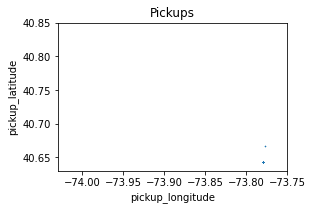

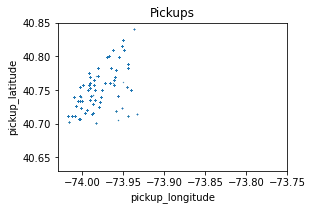

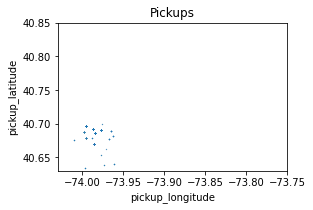

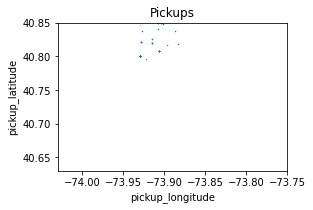

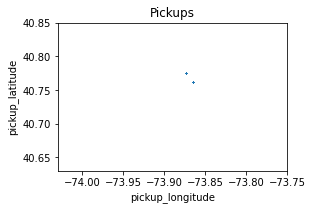

In [74]:
ax=plt.subplot(2,3,1)
plotPickupAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotPickupAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotPickupAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotPickupAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotPickupAreaEachPlace(LaGuardia,df,ax)

###### function for drop off from the boroughs

In [75]:
def plotDropAreaEachPlace(Area,data,ax):
    d=drop_place(Area,data)
    d.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

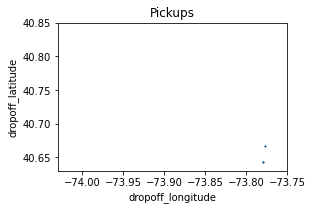

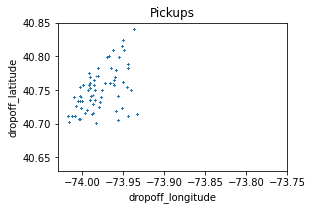

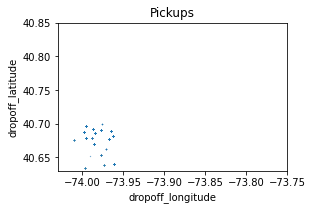

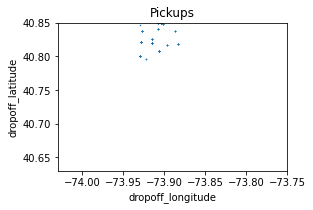

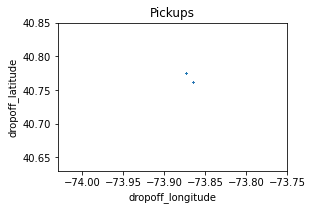

In [76]:
ax=plt.subplot(2,3,1)
plotDropAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotDropAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotDropAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotDropAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotDropAreaEachPlace(LaGuardia,df,ax)

place_mapping function which will take lat,lang and bounday area varibale it will map to particular area

It will return 1 if particular lat,lang's are within specific boundary.

e.g pickup coordinates which are within boundary for JFK Airport said to be JFK pickup trip and vice versa for drop

In [77]:
def place_mapping(lat,lang,place_area):
    if (lat>= place_area['min_lat']) & (lat<= place_area['max_lat']) & (lang>= place_area['min_long']) & (lang<= place_area['max_long']):
        return 1
    return 0

In [78]:
df['pickup_manhattan']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Manhattan),axis=1)
df['pickup_jfk']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],JFK),axis=1)
df['pickup_brooklyn']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Brooklyn),axis=1)
df['pickup_bronx']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Bronx),axis=1)
df['pickup_laGuardia']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],LaGuardia),axis=1)

In [79]:
df['drop_manhattan']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Manhattan),axis=1)
df['drop_jfk']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],JFK),axis=1)
df['drop_brooklyn']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Brooklyn),axis=1)
df['drop_bronx']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Bronx),axis=1)
df['drop_laGuardia']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],LaGuardia),axis=1)

Airport trip has the fixed rate so it is good to have a column which show whether trip is airport trip or not

In [80]:
def isAirportTrip(pickupJFK,dropJFK,pickupLaG,dropLaG):    
    if pickupJFK==1 or dropJFK==1 or pickupLaG==1 or dropLaG==1:
        return 1
    return 0

In [81]:
df['isAirportTrip']=df.apply(lambda row:isAirportTrip(row['pickup_jfk'],row['drop_jfk'],row['pickup_laGuardia'],row['drop_laGuardia']),axis=1)

Till here we have pre-processed our data and feature engineering done

# Save the pre-processed and feature_eng data in CSV file

In [82]:
from secrets import access_key, secret_access_key

In [83]:
client = boto3.client('s3',
                        aws_access_key_id = access_key,
                        aws_secret_access_key = secret_access_key)

In [84]:
df.to_csv("./feature_model.csv",index=False)

In [85]:
client.upload_file('./feature_model.csv', 'nyc-taxi-system', 'feature_model.csv')
print("Uploaded on AWS")
# os.remove('./feature_model.csv')
# print("File removed")

Uploaded on AWS
